#### Tecnológico de Costa Rica
#### Escuela de Física
IF4702 - Física Computacional I\
Grupo 1\
Prof. Jose Esteban Pérez Hidalgo\
Prof. Álvaro Amador Jara

Estudiantes:
* Frandy Arroyo Vargas 2019065491
* Reiner Ureña Vega  2019061777


## Tarea semana 13: Simulación Metrópolis-Montecarlo - Modelo de Ising en 1D.

### Simulación del modelo de Ising
##### a) Escriba una rutina que implemente el algoritmo Metrópolis simular un modelo de Ising en 1D. Para probar su simulación use inicialmente los siguientes parámetros: $ J=1 $ (comportamiento ferromagnético) y $k_BT = 1$ y $nEspines = 20$. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Valores Constantes
valorj = 1
nEspines = 100
nPasos = 100

#Se encarga de calcularla energía de cada estado (arreglo).
def calc_energia(arreglo):  #Arreglo se refiere a cada estado
    energia=0
    for i in range(-1,len(arreglo)-1):
        energia+=arreglo[i]*arreglo[i+1]
    return -valorj*energia

def calc_magnet(arreglo): #Calcula la magnetización de cada estado
    magnet=0
    for i in range(0,len(arreglo)):
        magnet+=arreglo[i]
    return magnet


def cambio_spin(arregloEspines,nPasos, k_bT = 1):  #Cambia el spín y realiza la desición si saltar al próximo estado.
    '''
    Entrdas:
        arregloEspines: configuración inicial de los espines.
        nPasos: corresponde al número de pasos que va a tener la simulación.
        k_bT: Temperatura de boltzman del sistema a trabajar.
    
    Salidas:
        config_Espines: devuelve una matriz con columnas como el estado del los espines en cada paso.
        registro_energias: devuelve el registro de las energías en cada paso.
    
    '''
    config_Espines = np.zeros((nPasos,len(arregloEspines)))   #Se inicializa una matriz de ceros para luego almacenar los estados en cada paso
    config_Espines[0]=arregloEspines   #Se establece el estado inicial
    registro_energias = []   #Se inicializa un arreglo para agregar el valor de las energías de cada estado.
    registro_magnet=[]
    for i in range(1,nPasos): #Ciclo para los nPasos
        #Estado Inicial
        energia_inicial=calc_energia(arregloEspines)
        
        #Siguiente estado posible
        spin_elegido=np.random.randint(len(arregloEspines))   #Se elige el spín a cambiar
        arregloEspines[spin_elegido]*=-1
        energia_final=calc_energia(arregloEspines)
        
        delta_energia=energia_final-energia_inicial
        if delta_energia>0:
            if np.random.random() < np.exp(-delta_energia/k_bT):  #Se realiza el cálculo de la probabilidad
                pass                                              #para saltar a otro estado de mayor energía
            else:
                arregloEspines[spin_elegido]*=-1

        config_Espines[i] = arregloEspines
        registro_energias.append(calc_energia(arregloEspines))
        registro_magnet.append(calc_magnet(arregloEspines))
        
    
    return config_Espines,registro_energias,registro_magnet

##### b) Investigue el estado de equilibrio al que tiende el sistema, observando el comportamiento para una ejecución del modelo de Ising usando tres configuraciones iniciales: configuración inicial ordenada (espines fríos, deben simularse los casos espines arriba y espines abajo) y una configuración desordenada (espines calientes, configuración aleatoria)

Como no existe un campo magnético que beneficie ninguna orientación de espines, estos van a tener fluctuaciones aleatorias, y como un espin es influenciado por sus vecinos, estas fluctuaciones favorecen la aparición de dominios. Al realizar la simulación del comortamiento más adelante, se observa que el estado de equilibrio no es afectado por la condición inicial, ya que el comportamiento es gobernado por cambios aleatorios que establecen la probabilidad de saltar al estado siguiente.

In [2]:
#Número de espines en cada estado
nEspines=100
# Configuración para espines arriba:
Espinesarriba = np.ones(nEspines)*(1)  #Con valor 1 positivo
# Configuración para espines abajo:
Espinesabajo =np.ones(nEspines)*(-1)
# Configuración para espines calientes
Espinescalientes=np.zeros(nEspines)
for i in range(0,nEspines):
    if np.random.random()<0.5:
        Espinescalientes[i]=-1
    else: 
        Espinescalientes[i]=1

##### c) Genere gráficas del comportamiento para nEspines = 100, donde se muestre en el eje vertical el sistema de espines y en el eje horizontal el estado del sistema para cada paso del tiempo con nPasos = 1000.

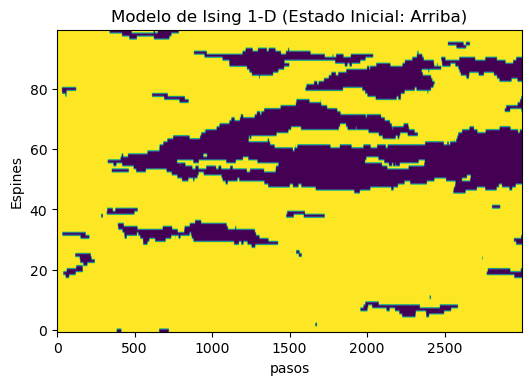

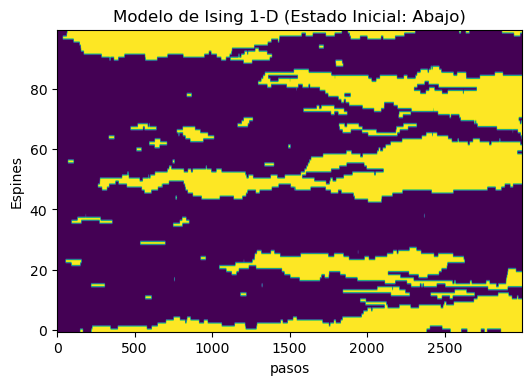

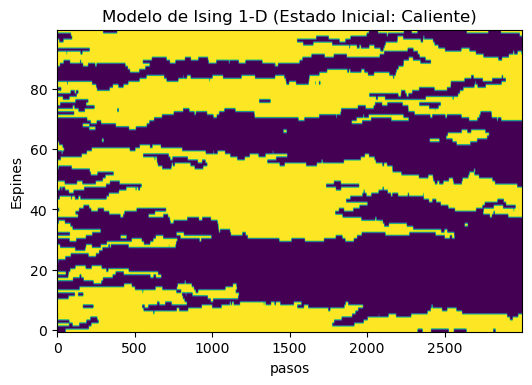

In [3]:
nPasos=3000
# Estado inicial arriba
Estado1,Registro1,Magnetizacion1=cambio_spin(Espinesarriba,nPasos,1)
# Estado inicial abajo
Estado2,Registro2,Magnetizacion2=cambio_spin(Espinesabajo,nPasos,1)

# Estado inicial caliente
Estado3,Registro3,Magnetizacion3=cambio_spin(Espinescalientes,nPasos,1)


#Generación de gráficas

#Gráfica con estado inicial arriba.

fig = plt.figure(dpi=100)
plt.imshow(Estado1.transpose(),aspect='auto')
plt.title('Modelo de Ising 1-D (Estado Inicial: Arriba)')
plt.xlabel('pasos')
plt.ylabel('Espines')
#plt.set_yticks([0,50,100])
##ax.set_aspect('equal', adjustable='box')
plt.gca().invert_yaxis()
plt.show()

#Gráfica con estado inicial abajo.
fig1 = plt.figure(dpi=100)
plt.imshow(Estado2.transpose(),aspect='auto')
plt.title('Modelo de Ising 1-D (Estado Inicial: Abajo)')
plt.xlabel('pasos')
plt.ylabel('Espines')
plt.gca().invert_yaxis()

plt.show()

#Gráfica con estado inicial Caliente.
fig2 = plt.figure(dpi=100)
plt.imshow(Estado3.transpose(),aspect="auto")
plt.title('Modelo de Ising 1-D (Estado Inicial: Caliente)')
plt.xlabel('pasos')
plt.ylabel('Espines')
plt.gca().invert_yaxis()
plt.show()


##### d) Comente acerca del estado de equilibrio alcanzado por el sistema, ¿depende de la configuración inicial? Use como base la discusión del modelo de Ising en §15,2 de [1].
El sistema en las tres condiciones, llega a un estado de equilibrio en el cual se forman dominios con una orientación de espines determinadas, y no depende de la condición inicial ya que, los tres sistemas llegan a configuraciones similares (sin embargo, la configuración de espines calientes alcanza el equilibrio más rápido), esto debido a que no existe un campo magnético que favoresca una orientación, sino que el comportamiento se rige por las fluctuaiones aleatorias de los espines y la interacción con sus vecinos. 
A proximadamente, a patir de 1000 pasos se puede ver como se empiezan a formar los dominios, y se puede observar que después de aproximadamente 2500 pasos todos los sistemas presentan dominios bien definidos, y es acá donde se puede observar que se alcanza un equilibrio.

### Propiedades termodinámicas del modelo de Ising

##### a) Modifique la simulación para medir el comportamiento de la energía interna y la magnetización del sistema de espines en el tiempo

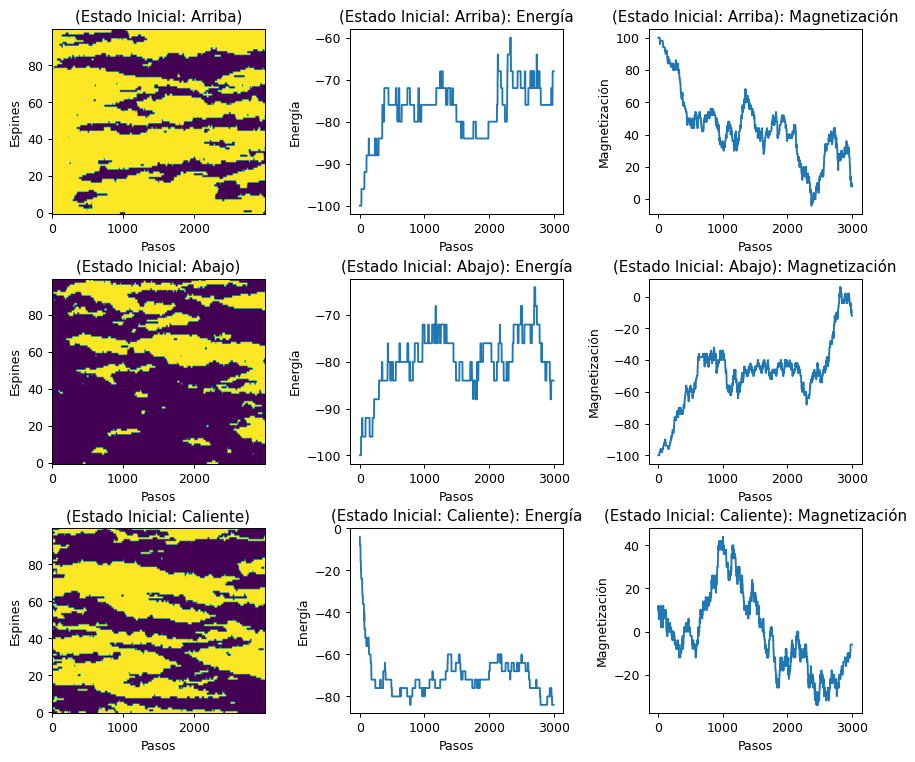

In [4]:
#Número de espines en cada estado
nEspines=100
# Configuración para espines arriba:
Espinesarriba = np.ones(nEspines)*(1)  #Con valor 1/2 positivo
# Configuración para espines abajo:
Espinesabajo =np.ones(nEspines)*(-1)
# Configuración para espines calientes
Espinescalientes=np.zeros(nEspines)
for i in range(0,nEspines):
    if np.random.random()<0.5:
        Espinescalientes[i]=-1
    else: 
         Espinescalientes[i]=1

nPasos=3000

#La modificación para el cálculo de la energía y para la magnetización se realizó desde el la primera implemetación
#de la simulación, en esta parte se toman los valores de Resgistro# (registro de energías) y MAgnetizacion# (registro de la magntización)

# Estado inicial arriba
Estado1,Registro1,Magnetizacion1=cambio_spin(Espinesarriba,nPasos,1)
# Estado inicial abajo
Estado2,Registro2,Magnetizacion2=cambio_spin(Espinesabajo,nPasos,1)

# Estado inicial calientes
Estado3,Registro3,Magnetizacion3=cambio_spin(Espinescalientes,nPasos,1)


#Generación de gráficas
fig, pts = plt.subplots(3, 3,dpi = 90)

#Gráfica con estado inicial arriba.
pts[0,0].imshow(Estado1.transpose(),aspect='auto')
pts[0,0].set_title('(Estado Inicial: Arriba)')
pts[0,0].set_xlabel('Pasos')
pts[0,0].set_ylabel('Espines')
pts[0,0].invert_yaxis()
#Grafica con estado inicial arriba energía.
pts[0,1].plot(np.linspace(0,nPasos,len(Registro1)),Registro1)
pts[0,1].set_title('(Estado Inicial: Arriba): Energía')
pts[0,1].set_xlabel('Pasos')
pts[0,1].set_ylabel('Energía')
#Grafica con estado inicial arriba magnetización.
pts[0,2].plot(np.linspace(0,nPasos,len(Magnetizacion1)),Magnetizacion1)
pts[0,2].set_title('(Estado Inicial: Arriba): Magnetización')
pts[0,2].set_xlabel('Pasos')
pts[0,2].set_ylabel('Magnetización')

#Gráfica con estado inicial abajo.
pts[1,0].imshow(Estado2.transpose(),aspect='auto')
pts[1,0].set_title('(Estado Inicial: Abajo)')
pts[1,0].set_xlabel('Pasos')
pts[1,0].set_ylabel('Espines')
pts[1,0].invert_yaxis()
#Grafica con estado inicial abajo energía.
pts[1,1].plot(np.linspace(0,nPasos,len(Registro2)),Registro2)
pts[1,1].set_title('(Estado Inicial: Abajo): Energía')
pts[1,1].set_xlabel('Pasos')
pts[1,1].set_ylabel('Energía')
#Grafica con estado inicial arriba magnetización.
pts[1,2].plot(np.linspace(0,nPasos,len(Magnetizacion2)),Magnetizacion2)
pts[1,2].set_title('(Estado Inicial: Abajo): Magnetización')
pts[1,2].set_xlabel('Pasos')
pts[1,2].set_ylabel('Magnetización')

#Gráfica con estado inicial Caliente.
pts[2,0].imshow(Estado3.transpose(),aspect='auto')
pts[2,0].set_title('(Estado Inicial: Caliente)')
pts[2,0].set_xlabel('Pasos')
pts[2,0].set_ylabel('Espines')
pts[2,0].invert_yaxis()
#Grafica con estado inicial caliente energía.
pts[2,1].plot(np.linspace(0,nPasos,len(Registro3)),Registro3)
pts[2,1].set_title('(Estado Inicial: Caliente): Energía')
pts[2,1].set_xlabel('Pasos')
pts[2,1].set_ylabel('Energía')
#Grafica con estado inicial caliente magnetización.
pts[2,2].plot(np.linspace(0,nPasos,len(Magnetizacion3)),Magnetizacion3)
pts[2,2].set_title('(Estado Inicial: Caliente): Magnetización')
pts[2,2].set_xlabel('Pasos')
pts[2,2].set_ylabel('Magnetización')

plt.subplots_adjust(left=0.00001,
                    bottom=0.1, 
                    right=1.5, 
                    top=2, 
                    wspace=0.4, 
                    hspace=0.35)
plt.show()



##### b. Se van a utilizar tres configuraciones iniciales: todos los espines hacia arriba, todos los espines hacia arriba y todos los espines ordenados de manera aleatoria.
##### c. Para calcular los resultados de la simulación debe esperarse a que el sistema entre en el estado de equilibrio. Es decir, ejecute la simulación del modelo de Ising por un tiempo suficiente. Con el sistema en equilibrio calcule los valores de energía y magnetización para un solo valor de temperatura.

In [5]:
# Se define que el estado de equilibrio se alcanza a los 2500 pasos
equilibrio = 2500
#Se calcula la energía y la magnetizacion despues de 2500 pasos para las 3 configuraciones iniciales
RegistroEnergia = [Registro1, Registro2, Registro3]     #Se guardan los tres registros de energía para cada condición inicial
Magnetizacion = [Magnetizacion1, Magnetizacion2, Magnetizacion3]  #Se guardan los tres registros de magnetización para cada condición inicial
energia_promedio, magnetizacion_promedio = [0,0,0], [0,0,0] # Se inicializa las listas para almacenar los resultados para cada condicioón inicial

for j in range(3):   #Se calculan los promedios para cada registro, en cada una de las condiciones iniciales.
    energia_promedio[j] = np.sum(RegistroEnergia[j][equilibrio:])/(len(Registro1)-equilibrio)
    magnetizacion_promedio[j] = np.sum(Magnetizacion[j][equilibrio:])/(len(Registro1)-equilibrio)

    # Se da como salida los valores promedio para casa condición
print('Valores de energía promedio a una temperatura fija')
print('Espines arriba: ', energia_promedio[0])
print('Espines abajo: ', energia_promedio[1])
print('Espines calientes: ', energia_promedio[2])
print('\nValores de magnetizacion promedio a una temperatura fija')
print('Espines arriba: ', magnetizacion_promedio[0])
print('Espines abajo: ', magnetizacion_promedio[1])
print('Espines calientes: ', magnetizacion_promedio[2])

Valores de energía promedio a una temperatura fija
Espines arriba:  -72.87374749498998
Espines abajo:  -75.84769539078157
Espines calientes:  -75.92785571142285

Valores de magnetizacion promedio a una temperatura fija
Espines arriba:  28.725450901803608
Espines abajo:  -19.987975951903806
Espines calientes:  -20.248496993987978


##### d. Para reducir las fluctuaciones aleatorias en el cálculo de los valores promedio haciendo varias ejecuciones de la simulación. Es decir, ejecute la simulación un número nSimulaciones = 20 para el mismo valor de temperatura. Finalmente calcule el promedio de las variables medidas para definir el resultado de la simulación. De esta manera se obtienen valores de energía y magnetización para una temperatura.


In [6]:
def EnegiayMagnetizacion(nEspines, nPasos, k_bT,tipo_spin):
    '''
    nEspines: número de espines por estado
    nPasos: pasos en el tiempo que desean simular
    k_bT: constante de Boltzmann multiplicada por la temperatura
    tipo_spin: puede ser: "arriba", "abajo" o "caliente"
    
    Return:
        Registro: Devuelve el registro de energías para una simulación
        Magnetizacion: Devuelve el registro de magnetización para los estados en una simuación
    '''
    # Configuración para espines arriba:
    Espinesarriba = np.ones(nEspines)*(1)  #Con valor 1/2 positivo
    # Configuración para espines abajo:
    Espinesabajo =np.ones(nEspines)*(-1)
    # Configuración para espines calientes
    Espinescalientes=np.zeros(nEspines)
    for i in range(0,nEspines):
        if np.random.random()<0.5:
            Espinescalientes[i]=-1
        else: 
             Espinescalientes[i]=1
    # Estado inicial arriba
    if tipo_spin == 'arriba':
        Estado, Registro, Magnetizacion = cambio_spin(Espinesarriba,nPasos, k_bT)
    elif tipo_spin == 'abajo':
        Estado, Registro, Magnetizacion = cambio_spin(Espinesabajo,nPasos, k_bT)
    # Estado inicial calientes
    elif tipo_spin == 'caliente':    
        Estado, Registro, Magnetizacion = cambio_spin(Espinescalientes,nPasos, k_bT)
    
    return Registro, Magnetizacion

def Promedios(RegistroEnergia, Magnetizacion): 
    # Se encarga de establecer el promedio una vez legado a un equilibrio, en este caso se estima que lo alcanza a los 2000 pasos.
    equilibrio = 2500
    energia_promedio, magnetizacion_promedio = 0, 0
    energia_promedio = np.sum(RegistroEnergia[equilibrio:])/(len(RegistroEnergia)-equilibrio)
    magnetizacion_promedio = np.sum(Magnetizacion[equilibrio:])/(len(RegistroEnergia)-equilibrio)
    return energia_promedio, magnetizacion_promedio   # Retorna una energía y magnetización promedio cuando se alcanza el equilibrio.

#Se calcula el promedio de la energía y la magnetizacion para nSimulaciones  = 20
def SimulacionesEnergia_Magnet_Calor_segun_kbT(nSimulaciones, k_bT, tipo_spin):
    '''
    nSimulaciones: número de simulaciones que se desean realizar para obtener un estimador 
    k_bT: constante de Boltzmann multiplicada por la temperatura
    tipo_spin:  puede ser: "arriba", "abajo" o "caliente"
    '''
    suma_energia, suma_magnetizacion = 0, 0
    promedio_final_energia, promedio_final_magnetizacion, mU_2, calor_especifico = 0, 0, 0, 0  # Se incializan los valores a retornar
    for i in range(nSimulaciones):  #Ciclo que seraliza las nSimulaciones.
        RegistroEnergia, Magnetizacion = EnegiayMagnetizacion(100, 3000, k_bT, tipo_spin)
        energia, magnetizacion = Promedios(RegistroEnergia, Magnetizacion)
        suma_energia += energia
        suma_magnetizacion += magnetizacion
        mU_2 += energia**2
    promedio_final_energia = suma_energia/nSimulaciones    #Promedio final de las energías de nSimulaciones en el equilibrio 
    promedio_final_magnetizacion = suma_magnetizacion/nSimulaciones   #Promedio final de la magnetización de nSimulaciones en el equilibrio 
    calor_especifico = (100/(nEspines**2))*((mU_2/nSimulaciones)-promedio_final_energia**2)/(k_bT**2)  #Valor del calor específico
    return promedio_final_energia, promedio_final_magnetizacion, calor_especifico, tipo_spin 

promedio_final_energia, promedio_final_magnetizacion, calor_especifico, tipo_spin = SimulacionesEnergia_Magnet_Calor_segun_kbT(20, 1,'arriba')


####Imprime en pantalla los resultados obtenidos del promedio de los valores obtenidos para las 20 simulaciones

print('Valores de energía, magnetizacion y calor especifico promedio de nSimulaciones = 20')
print('Temperatura fija: k_bT = 1\n')
print('Valor de energía promedio espines {0}: {1}'.format(tipo_spin, promedio_final_energia))
print('Valor de magnetización promedio espines {0}: {1}'.format(tipo_spin, promedio_final_magnetizacion))
print('Valor de calor especifico promedio espines {0}: {1}'.format(tipo_spin, calor_especifico))

promedio_final_energia, promedio_final_magnetizacion, calor_especifico, tipo_spin = SimulacionesEnergia_Magnet_Calor_segun_kbT(20, 1,'abajo')
print('\nValor de energía promedio espines {0}: {1}'.format(tipo_spin, promedio_final_energia))
print('Valor de magnetización promedio espines {0}: {1}'.format(tipo_spin, promedio_final_magnetizacion))
print('Valor de calor especifico promedio espines {0}: {1}'.format(tipo_spin, calor_especifico))

promedio_final_energia, promedio_final_magnetizacion, calor_especifico, tipo_spin = SimulacionesEnergia_Magnet_Calor_segun_kbT(20, 1,'caliente')
print('\nValor de energía promedio espines {0}: {1}'.format(tipo_spin, promedio_final_energia))
print('Valor de magnetización promedio espines {0}: {1}'.format(tipo_spin, promedio_final_magnetizacion))
print('Valor de calor especifico promedio espines {0}: {1}'.format(tipo_spin, calor_especifico))

Valores de energía, magnetizacion y calor especifico promedio de nSimulaciones = 20
Temperatura fija: k_bT = 1

Valor de energía promedio espines arriba: -75.92264529058117
Valor de magnetización promedio espines arriba: 17.280160320641286
Valor de calor especifico promedio espines arriba: 0.17458084264720128

Valor de energía promedio espines abajo: -78.21122244488977
Valor de magnetización promedio espines abajo: -27.225250501002
Valor de calor especifico promedio espines abajo: 0.3136008144545758

Valor de energía promedio espines caliente: -76.56312625250499
Valor de magnetización promedio espines caliente: 4.180360721442886
Valor de calor especifico promedio espines caliente: 0.35154839538799937


##### e. Ejecute simulaciones para cada configuración inicial para obtener gráficas del comportamiento de: la energía interna U, la magnetización M y calor específico para el intervalo 0 < kBT < 5. Deben generarse 9 gráficas.

#### f. Compare los resultados obtenidos con las soluciones analíticas presentadas en § 15.3.1. de [1]. Es decir, en cada gráfico resultante de las simulaciones debe superponerse la gráfica de la solución analítica del sistema, con los parámetros adecuados según sea el caso.

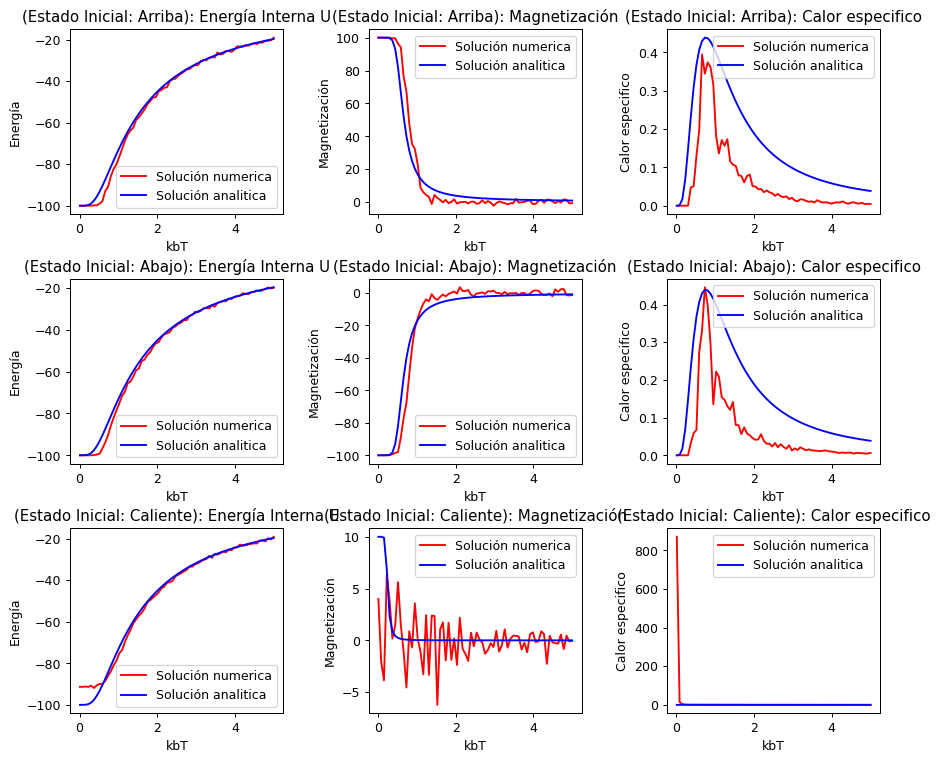

In [7]:
#Se define el intervalo 0<kbT<5
def Energia_Magnetizacion_Calor_especifico_kbT(tipo_spin):
    valores_kbT = np.linspace(0.01,5,70)
    valores_energia_segun_kbT = np.zeros(70)
    valores_magnetizacion_segun_kbT = np.zeros(70)
    valores_calor_especifico_segun_kbT = np.zeros(70)

    #Se calculan la energia, magnetizacion, calor especifico promedio de las nSimulaciones segun cada k_bT asignado
    for i in range(len(valores_kbT)):
        promedio_final_energia, promedio_final_magnetizacion, calor_especifico, tipo_spin1 = SimulacionesEnergia_Magnet_Calor_segun_kbT(70, valores_kbT[i], tipo_spin)
        valores_energia_segun_kbT[i] = promedio_final_energia
        valores_magnetizacion_segun_kbT[i] = promedio_final_magnetizacion
        valores_calor_especifico_segun_kbT[i] = calor_especifico
    return valores_kbT, valores_energia_segun_kbT, valores_magnetizacion_segun_kbT, valores_calor_especifico_segun_kbT


#Soluciones analiticas según el Landau
B=0
valorj = 1
valores_kbT = np.linspace(0.1,5,70)
energia_analitica = np.zeros(len(valores_kbT))
magnetizacion_analitica_arriba = np.zeros(len(valores_kbT))
magnetizacion_analitica_abajo = np.zeros(len(valores_kbT))
magnetizacion_analitica_caliente = np.zeros(len(valores_kbT))
calor_especifico_analitica = np.zeros(len(valores_kbT))

for i in range(len(valores_kbT)):
    energia_analitica[i] = -nEspines*(np.exp(valorj/valores_kbT[i])-np.exp(-valorj/valores_kbT[i]))/(np.exp(valorj/valores_kbT[i])+np.exp(-valorj/valores_kbT[i]))
    magnetizacion_analitica_arriba[i] = nEspines*(np.exp(valorj/valores_kbT[i])*np.sinh(0.03/valores_kbT[i]))/(np.exp(2*valorj/valores_kbT[i])*(np.sinh(0.03/valores_kbT[i]))**2+np.exp(-2*valorj/valores_kbT[i]))**(1/2)
    magnetizacion_analitica_abajo[i] = nEspines*(np.exp(valorj/valores_kbT[i])*np.sinh(-0.03/valores_kbT[i]))/(np.exp(2*valorj/valores_kbT[i])*(np.sinh(-0.03/valores_kbT[i]))**2+np.exp(-2*valorj/valores_kbT[i]))**(1/2)
    magnetizacion_analitica_caliente[i] = 10*(np.exp(valorj/valores_kbT[i])*np.sinh(0.0005/valores_kbT[i]))/(np.exp(2*valorj/valores_kbT[i])*(np.sinh(0.0005/valores_kbT[i]))**2+np.exp(-2*valorj/valores_kbT[i]))**(1/2)
    calor_especifico_analitica[i] = (valorj/valores_kbT[i])**2/(np.cosh(valorj/valores_kbT[i]))**2

#Generación de gráficas
fig, pts = plt.subplots(3, 3,dpi = 90)

#Espines Arriba
valores_kbT, valores_energia_segun_kbT, valores_magnetizacion_segun_kbT, valores_calor_especifico_segun_kbT = Energia_Magnetizacion_Calor_especifico_kbT('arriba')
#Gráfica con estado inicial arriba energía.
pts[0,0].plot(valores_kbT,valores_energia_segun_kbT, c='r', label='Solución numerica')
pts[0,0].plot(valores_kbT, energia_analitica, c='b', label='Solución analitica')
pts[0,0].set_title('(Estado Inicial: Arriba): Energía Interna U')
pts[0,0].set_xlabel('kbT')
pts[0,0].set_ylabel('Energía')
pts[0,0].legend(loc='best')
#Grafica con estado inicial arriba magnetización.
pts[0,1].plot(valores_kbT,valores_magnetizacion_segun_kbT, c='r', label='Solución numerica')
pts[0,1].plot(valores_kbT, magnetizacion_analitica_arriba, c='b', label='Solución analitica')
pts[0,1].set_title('(Estado Inicial: Arriba): Magnetización')
pts[0,1].set_xlabel('kbT')
pts[0,1].set_ylabel('Magnetización')
pts[0,1].legend(loc='best')
#Grafica con estado inicial arriba calor especifico.
pts[0,2].plot(valores_kbT,valores_calor_especifico_segun_kbT, c='r', label='Solución numerica')
pts[0,2].plot(valores_kbT, calor_especifico_analitica, c='b', label='Solución analitica')
pts[0,2].set_title('(Estado Inicial: Arriba): Calor especifico')
pts[0,2].set_xlabel('kbT')
pts[0,2].set_ylabel('Calor especifico')
pts[0,2].legend(loc='best')

#Espines Abajo
valores_kbT, valores_energia_segun_kbT1, valores_magnetizacion_segun_kbT1, valores_calor_especifico_segun_kbT1 = Energia_Magnetizacion_Calor_especifico_kbT('abajo')
#Gráfica con estado inicial abajo energía.
pts[1,0].plot(valores_kbT,valores_energia_segun_kbT1, c='r', label='Solución numerica')
pts[1,0].plot(valores_kbT, energia_analitica,c='b', label='Solución analitica')
pts[1,0].set_title('(Estado Inicial: Abajo): Energía Interna U')
pts[1,0].set_xlabel('kbT')
pts[1,0].set_ylabel('Energía')
pts[1,0].legend(loc='best')
#Grafica con estado inicial abajo magnetización.
pts[1,1].plot(valores_kbT,valores_magnetizacion_segun_kbT1, c='r', label='Solución numerica')
pts[1,1].plot(valores_kbT, magnetizacion_analitica_abajo,c='b', label='Solución analitica')
pts[1,1].set_title('(Estado Inicial: Abajo): Magnetización')
pts[1,1].set_xlabel('kbT')
pts[1,1].set_ylabel('Magnetización')
pts[1,1].legend(loc='best')
#Grafica con estado inicial abajo calor especifico.
pts[1,2].plot(valores_kbT,valores_calor_especifico_segun_kbT1,c='r', label='Solución numerica')
pts[1,2].plot(valores_kbT, calor_especifico_analitica,c='b', label='Solución analitica')
pts[1,2].set_title('(Estado Inicial: Abajo): Calor especifico')
pts[1,2].set_xlabel('kbT')
pts[1,2].set_ylabel('Calor especifico')
pts[1,2].legend(loc='best')

#Espines Calientes
valores_kbT, valores_energia_segun_kbT2, valores_magnetizacion_segun_kbT2, valores_calor_especifico_segun_kbT2 = Energia_Magnetizacion_Calor_especifico_kbT('caliente')
#Gráfica con estado inicial caliente energía.
pts[2,0].plot(valores_kbT,valores_energia_segun_kbT2,c='r', label='Solución numerica')
pts[2,0].plot(valores_kbT, energia_analitica,c='b', label='Solución analitica')
pts[2,0].set_title('(Estado Inicial: Caliente): Energía Interna U')
pts[2,0].set_xlabel('kbT')
pts[2,0].set_ylabel('Energía')
pts[2,0].legend(loc='best')
#Grafica con estado inicial caliente magnetización.
pts[2,1].plot(valores_kbT,valores_magnetizacion_segun_kbT2, c='r', label='Solución numerica')
pts[2,1].plot(valores_kbT, magnetizacion_analitica_caliente, c='b', label='Solución analitica')
pts[2,1].set_title('(Estado Inicial: Caliente): Magnetización')
pts[2,1].set_xlabel('kbT')
pts[2,1].set_ylabel('Magnetización')
pts[2,1].legend(loc='best')
#Grafica con estado inicial caliente calor especifico.
pts[2,2].plot(valores_kbT,valores_calor_especifico_segun_kbT2, c='r', label='Solución numerica')
pts[2,2].plot(valores_kbT, calor_especifico_analitica, c='b', label='Solución analitica')
pts[2,2].set_title('(Estado Inicial: Caliente): Calor especifico')
pts[2,2].set_xlabel('kbT')
pts[2,2].set_ylabel('Calor especifico')
pts[2,2].legend(loc='best')

plt.subplots_adjust(left=0.00001,
                    bottom=0.1, 
                    right=1.5, 
                    top=2, 
                    wspace=0.4, 
                    hspace=0.35)
plt.show()

#### g. Finalmente, comente los resultados obtenidos: para cada gráfica discuta si los resultados coinciden con las predicciones analíticas, compare los resultados finales obtenidos para cada configuración y finalmente comente si el algoritmo de metrópolis es una herramienta efectiva para simular el modelo de Ising 1D.

Las soluciones numéricas son coincidentes con las analíticas, aunque para la magnetización y calor específico hay leves fluctuaciones. En las tres condiciones iniciales se obtienen los mismos resultados para la energía interna, la magnetización y el calor específico, esto porque las gráficas obtenidas son de sistemas (modelos de Ising) en equilibrio.  Cabe mencionar que en el caso de la solución analítica para los espines calientes o aleatorios, es una solución particular, ya que la solución numérica puede diferir de la analítica ya que puede empezar en un valor aleatorio diferente al punto de inicio de la analítica.Aquí hay un aumento en la energía interna cuando las temperaturas (kbT) aumentan, llegando a un máximo de -20 para el intervalo 0<kbT<5.
 
 Luego para la magnetización, los comportamientos son iguales exceptuando el hecho que para espines abajo se toma en cuenta la orientación del espín como diferente a espines arriba de modo que los valores son negativos. Ahora desde ambas condiciones iniciales, la magnetización converge a cero a partir de valores mayores a 1 (kbT), esto porque el sistema no será frío, sino que tendrá más temperatura (Energía interna) de manera que los espines se comportan de forma aleatoria y así el B de los dipolos magnéticos se cancelan entre sí. En cuanto a la condición aleatoria, aquí ya inicia la magnetización cercana al cero debido a que la distribución de espines ya se encuentra en un estado inicial aleatorio de forma que el B neto causado por los dipolos magnéticos es muy leve. Finalmente, en el calor específico el comportamiento numérico es el esperado a pesar de las fluctuaciones a kbT iniciales, pues se observa que a mayores temperaturas el sistema decae lo suficiente, ya que se necesita menos calor para elevar el sistema aleatorio. Por todo lo anterior, las condiciones iniciales del sistema no afectan el equilibrio, se poseen los mismos comportamientos en las magnitudes físicas mencionadas.

Como la simulación por Metrópolis generó resultados casi iguales a los analíticos, entonces se afirma que es un método que permite evaluar comportamientos como el modelo Ising 1D de forma efectiva; sin embargo, requiere de muchos cálculos para una solución precisa de forma que consume mucho tiempo computacional. Esto último, hace que el algoritmo de metropolis no sea un método eficiente. Nota: Se utilizaron 20 simulaciones, 70 valores kbT, 3000 pasos para 100 espines.
